# Exercise: Fitting a Lorentzian peak over a quadratic background

Let's try to fit a slightly more complex distribution than a gaussian. The following histogram should fit well a Lorenzian peak on quadratic background.

Here is the histogram:

In [3]:
import ROOT

data = [ 6,1,10,12,6,13,23,22,15,21,
         23,26,36,25,27,35,40,44,66,81,
         75,57,48,45,46,41,35,36,53,32,
         40,37,38,31,36,44,42,37,32,32,
         43,44,35,33,33,39,29,41,32,44,
         26,39,29,35,32,21,21,15,25,15 ]

title = 'Lorentzian Peak on Quadratic Background'
h = ROOT.TH1F('histo', title, nbinsx=60, xlow=0, xup=3)

for i, x in enumerate(data):
   h.SetBinContent(i+1, x) # bin 0 is the underflow bin!

Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).


Here are the functions we will use; a quadratic background function:

In [5]:
%%cpp

double background(double *x, double *par) {
  return par[0] + par[1]*x[0] + par[2]*x[0]*x[0];
}

A function for the Lorenzian peak (N.B. for simplicity we already put the peak in the right place :) )

In [6]:
%%cpp

double lorentzianPeak(double *x, double *par) {
  return (0.5*par[0]*0.2/TMath::Pi())
         / TMath::Max(1.e-10, (x[0] - 1.)*(x[0] - 1.) + .25*0.04);
}

...and our fit function is the sum of background and peak functions:

In [7]:
%%cpp

double fitFunction(double *x, double *par) {
  return background(x, par) + lorentzianPeak(x, &par[3]);
}

**Expected result:**

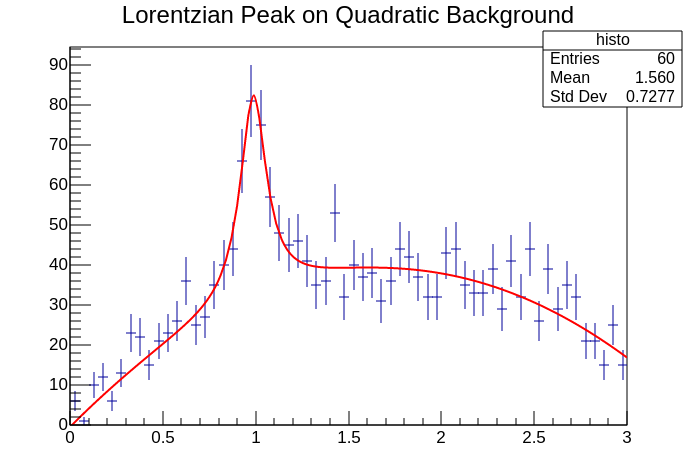

**Useful doc links:**

- [TH1](https://root.cern/doc/master/classTH1.html)
- [TF1](https://root.cern.ch/doc/master/classTF1.html)
- [TH1::Fit](https://root.cern.ch/doc/master/classTH1.html#a63eb028df86bc86c8e20c989eb23fb2a)

In [8]:
# Play with the histogram here. You will have to:
# - define a TF1 object that represents the fit function
# - fit the histogram with that function
# - draw the result (how do you plot the error bars? :) )

%jsroot on
c = ROOT.TCanvas()

fitFcn = ROOT.TF1('fitFcn', ROOT.fitFunction, xmin=0, xmax=3, npar=4)


h.Fit(fitFcn)
h.Draw("E")
c.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      60.4411
NDf                       =           56
Edm                       =  1.11523e-19
NCalls                    =           80
p0                        =    -0.896424   +/-   0.884567    
p1                        =      45.0577   +/-   2.46842     
p2                        =     -13.0281   +/-   0.905765    
p3                        =      14.8596   +/-   1.66543     
